<a href="https://colab.research.google.com/github/ap4ashutosh/torch101/blob/main/torch-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torch import nn

from matplotlib import pyplot as plt

# torch version
torch.__version__

'2.4.0+cu121'

In [10]:
# Data (Loading and preparing)
# Create known parameters for
w = 0.7
b = 0.29

# create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * x + b

x[:10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2900],
         [0.3040],
         [0.3180],
         [0.3320],
         [0.3460],
         [0.3600],
         [0.3740],
         [0.3880],
         [0.4020],
         [0.4160]]),
 50,
 50)

In [11]:
from sklearn.model_selection import train_test_split as tts

# train validation and test split
(x_train, x_test, y_train, y_test) = tts(x, y, test_size=0.2)

In [12]:
len(x_train), len(x_test)

(40, 10)

In [13]:
# visualization
def plot_predictions(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions = None):
    plt.style.use('dark_background')  # Set dark background style
    plt.figure(figsize=(10, 7))

    # Plot the training data
    plt.scatter(train_data, train_labels, c='b', s=4, label='training data')

    # Plot the testing data
    plt.scatter(test_data, test_labels, c='r', s=4, label='testing data')

    # Plot the predictions, if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=4, label='predictions')

    # Display legend
    plt.legend(prop={'size': 12})

    # Show the plot
    plt.show()

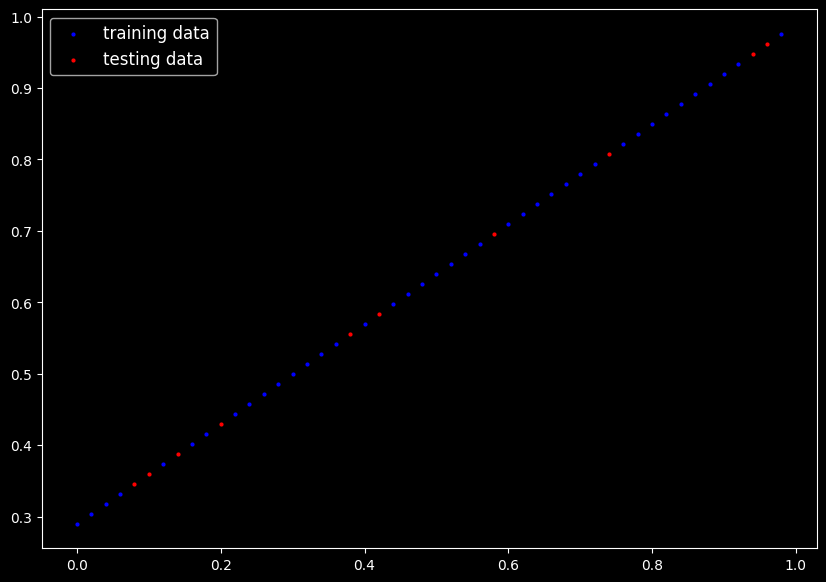

In [14]:
plot_predictions(x_train, y_train, x_test, y_test)

In [15]:
import pydantic

In [14]:
# Build model to predict on test data
# creating a linear regression

class LinearRegressionModel(nn.module):
  # almost everything in pytorch inherits from nn.modules
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

  # forward method for computation
  @pydantic.validator
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.w * x + self.b


```python
class LinearRegressionModel(nn.module):
```
Subclass of nn.module. This contains all the building blocks of neural networks so to create our own neural network this shoulda subclass of `nn.module`

```python
self.w = nn.Parameter(torch.randn(1,
                                  requires_grad = True,
                                  dtype = torch.float))
```
`requires_grad = True` means Pytorch will track the gradients of this specific parameter for use with `torch.autograd` and gradient descent (for many *torch.nn* modules, `requires_grad = True` is set default.

```python
def forward(self, x):
  return self.w * x + self.b
```
Any subclass of `nn.modules` requires a `forward` method to override the original one. This defines the operation to be happen